# 作业二：实现蓄水池抽样算法

蓄水池抽样算法作用在于针对海量的流式数据做到公平，保证每个元素被取样的概率相同。

## 蓄水池算法原理

**假设蓄水池的容量为K。**
对于第i个元素(i<=K)，在第K步之前被选中的概率为1。在K+1步被替换的概率为$ \frac{k}{k+1} * \frac{1}{K} = \frac{1}{K+1} $ ,则被保留的概率为$ 1-\frac{1}{K+1} = \frac{K}{K+1} $。可以推导在K+2、K+3、...、N步时，第i个元素任被保留的概率为：$$ 1 * \frac{K}{K+1} * \frac{K+1}{K+2} * \frac{K+2}{K+3} * ... * \frac{N-1}{N} = \frac{K}{N} $$

对于第i个元素(i>K)，在第i步被选中的概率为$ \frac{K}{i} $，在i+1步不被替换的概率为 $ 1 - \frac{K}{i+1} * \frac{1}{K} = \frac{i}{i+1} $，运行到第N步保留的概率为：$$ \frac{K}{i} * \frac{i}{i+1} * \frac{i+1}{i+2} * ... * \frac{N-1}{N} = \frac{K}{N} $$

所以对于其中每个元素，被保留的概率都为$ \frac{K}{N} $

## 算法过程

假设数据序列的规模为 N，需要采样的数量的为 K。综上所述：

1. 当i<=K的情况，元素被选中的概率为1，直接放入蓄水池。
2. 当i>K时，元素以$ \frac{K}{i} $的概率被选中，并替换蓄水池中的某个元素
3. 返回蓄水池

算法时间复杂度为$ Big O = N $

## 代码实现

In [4]:
import random
from unittest import TestCase
from matplotlib import pyplot as plt



class ReservoirSample(object):
    def __init__(self, capacity):
        # 记录第几个元素
        self.__counter = 0
        # 蓄水池容量
        self.__capacity = capacity
        # 蓄水池
        self.__samples = []

    def samp(self, item):
        self.__counter += 1
        # 当i<=K的情况
        if len(self.__samples) < self.__capacity:
            # 直接放入蓄水池
            self.__samples.append(item)
            return self.__samples
        # 当i>K的情况
        r = random.randrange(0, self.__counter)
        # 元素以 𝐾/𝑖 的概率被选中
        if r < self.__capacity:
            # 替换蓄水池元素
            self.__samples[r] = item
        return self.__samples

## 设计测试

1. 生成数据集(产生1000000个1-10的序列，则1000000个数)
2. 使用蓄水池采样100000个元素
3. 生成图表观察采样情况

预计结果：1-10每个元素的个数约为10000，被选中概率约为10%

统计数据:[(1, 9853), (2, 9989), (3, 9999), (4, 9906), (5, 10015), (6, 9991), (7, 10038), (8, 10090), (9, 10032), (10, 10087)]


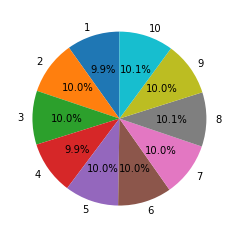

In [3]:
from unittest import TestCase
from matplotlib import pyplot as plt

def generate_data_set():
    data_set = []
    for i in range(1000000):
        for j in range(1, 11):
            data_set.append(j)
    return data_set    
    
def total(arr) -> []:
    data_dict = {}
    for item in arr:
        if data_dict.get(item) is not None:
            data_dict[item] += 1
        else:
            data_dict[item] = 1
    return data_dict


class TestReservoirSample(TestCase):
    def test_samp(self):
        data_set = generate_data_set()
        samples = []
        rs = ReservoirSample(100000)
        for item in data_set:
            samples = rs.samp(item)
        t = sorted(total(samples).items(), key=lambda item: item[0])
        print("统计数据:{}".format(t))
        labels = [x[0] for x in t]
        sizes = [x[1] for x in t]
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
        plt.show()
    
if __name__ == '__main__':
    TestReservoirSample().test_samp()

## 总结

根据测试的结果，蓄水池算法的实现没有出现错误，每个元素被选中的概率相同。